http://gaelvaroquaux.github.io/scikit-learn-tutorial/supervised_learning.html#support-vector-machines-svms

https://github.com/scikit-learn/scikit-learn/tree/master/sklearn

https://github.com/ipython/ipython/wiki/A-gallery-of-interesting-IPython-Notebooks

In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns; sns.set()

In [2]:
# plotting
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [3]:
import pandas.io.data as web
#from pandas_datareader import data as web
import pandas_datareader as pdr

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/pandas/io/data.py:33: FutureWarning: 
The pandas.io.data module is moved to a separate package (pandas-datareader) and will be removed from pandas in a future version.
After installing the pandas-datareader package (https://github.com/pydata/pandas-datareader), you can change the import ``from pandas.io import data, wb`` to ``from pandas_datareader import data, wb``.
  FutureWarning)


In [4]:
#pdr.get_data_yahoo('NIFTYBEES.NS')
NB = web.DataReader(name='NIFTYBEES.NS', data_source='yahoo',start='2008-1-1')

In [5]:
#NB.ix[:]['Close']

https://www.toptal.com/machine-learning/s-p-500-automated-trading

ADDING FEATURES

In [6]:
NB['Bar Change']= np.where(NB['Open']< NB['Close'], 1, -1)

In [7]:
NB['Open Change'] = np.sign(np.log(NB['Open'] /NB['Close'].shift(1)))

In [8]:
#NB['Log Return'] = np.sign(NB['Close'].apply(lambda x: np.log(x)))  

In [9]:
NB['Volume']=NB['Volume']/pd.rolling_mean(NB['Volume'],21)

In [10]:
#NB['Volatility']= np.where(pd.rolling_std(NB['Close'],42)>20,1,np.where(pd.rolling_std(NB['Close'],42)<-20,-1,0))
NB['Volatility']=NB['Close'].apply(lambda x: np.log(x))/pd.rolling_std(NB['Close'],42)

In [11]:
flagD=np.logical_and(np.logical_and(NB['Open'].shift(2)<NB['Close'].shift(3),NB['Open'].shift(1)< NB['Close'].shift(2)),NB['Open']< NB['Close'].shift(1))
flagU=np.logical_and(np.logical_and(NB['Open'].shift(2)>NB['Close'].shift(3),NB['Open'].shift(1)> NB['Close'].shift(2)),NB['Open']> NB['Close'].shift(1))

In [12]:
NB['3UD']= np.where(flagU, 1,np.where(flagD,-1,0))

In [13]:
import TA# self made python file at PyCON16 folder for TA

In [14]:
#https://mrjbq7.github.io/ta-lib/func.html
import talib

In [15]:
#Calculating momentum of the close prices, with a time period of 5:
NB['momentum'] = np.where(talib.MOM(np.asarray(NB['Close']), timeperiod=14)>30,1,np.where(talib.MOM(np.asarray(NB['Close']), timeperiod=14)<-30,-1,0))

In [16]:
NB['RSI'] = np.where(talib.RSI(np.asarray(NB['Close']), timeperiod=14)>60,1,np.where(talib.RSI(np.asarray(NB['Close']), timeperiod=14)<45,-1,0))

In [17]:
NB=NB.dropna()
NB.tail()

,Open,High,Low,Close,Volume,Adj Close,Bar Change,Open Change,Volatility,3UD,momentum,RSI
Date,,,,,,,,,,,,
2016-07-11,855.0,862.00,853.00,860.19,1.750000,860.19,1,1,0.331279,1,0,1
2016-07-12,865.0,866.00,860.19,865.32,0.619706,865.32,1,1,0.324573,1,1,1
2016-07-13,864.9,867.00,860.15,865.48,2.131202,865.48,1,-1,0.317143,0,1,1
2016-07-14,870.0,870.51,864.00,869.44,1.154326,869.44,-1,1,0.314452,0,0,1
2016-07-15,875.0,875.00,867.00,868.04,0.594136,868.04,-1,1,0.310273,0,1,1


GROUPING

ML

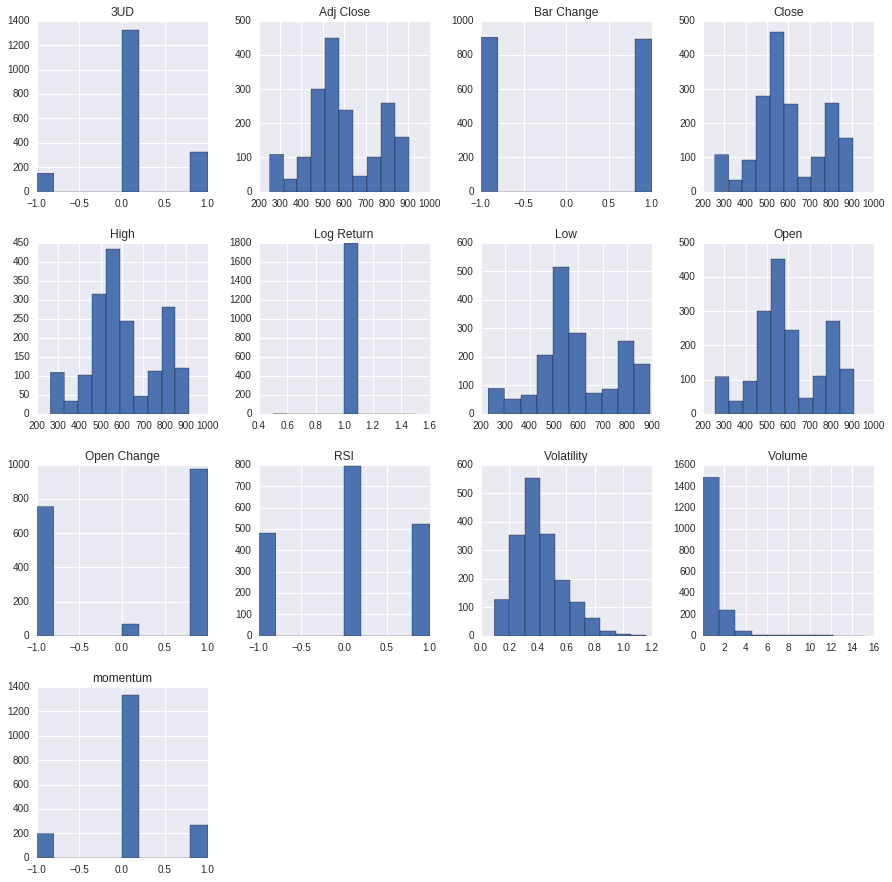

In [316]:
pd.DataFrame.hist(NB, figsize = [15,15]);

combating overfitting

In [19]:
X=NB[['Bar Change','Volatility','momentum','3UD','RSI']]

In [20]:
y=NB['Open Change']

http://www.astroml.org/sklearn_tutorial/general_concepts.html

In [22]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, whiten=True).fit(X)

In [23]:
pca.components_ 

array([[ 0.90083846,  0.00787466,  0.18784095,  0.01573137,  0.39101964],
       [ 0.43189815,  0.00219913, -0.46055935, -0.09041457, -0.77017495]])

In [24]:
pca.explained_variance_ratio_    

array([ 0.5177091 ,  0.28997693])

In [25]:
pca.explained_variance_ratio_.sum()  

0.80768603010176032

In [26]:
X_pca = pca.transform(X)

In [27]:
from sklearn.cluster import KMeans
from numpy.random import RandomState

In [28]:
rng = RandomState(42)
kmeans = KMeans(n_clusters=3, random_state=rng).fit(X_pca)

In [29]:
np.round(kmeans.cluster_centers_, decimals=2)

array([[-0.71, -0.95],
       [ 0.95,  0.34],
       [-1.3 ,  0.71]])

In [30]:
kmeans.labels_[:10]

array([0, 0, 2, 1, 2, 1, 2, 1, 1, 2], dtype=int32)

In [31]:
kmeans.labels_[-10:]

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 0], dtype=int32)

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
import pylab as pl
from itertools import cycle
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw')
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        pl.scatter(data[target == i, 0], data[target == i, 1],
                   c=c, label=label)
    pl.legend()
    pl.show()

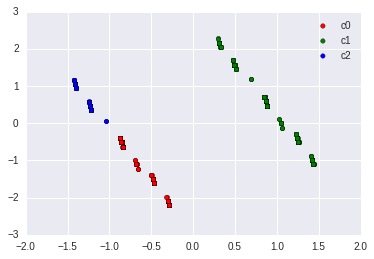

In [34]:
plot_2D(X_pca, kmeans.labels_, ["c0", "c1", "c2"])

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: in the future, boolean array-likes will be handled as a boolean array index


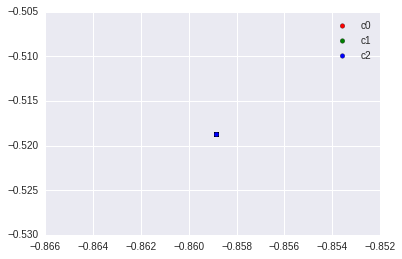

In [35]:
plot_2D(X_pca,y, ["c0", "c1", "c2"])

KNN

In [216]:
from sklearn import neighbors, linear_model
knn = neighbors.KNeighborsClassifier(n_neighbors = 5)
knn_model_1 = knn.fit(X_train, y_train)
print('k-NN accuracy for test set: %f' % knn_model_1.score(X_test, y_test))

k-NN accuracy for test set: 0.611111


In [217]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test, knn_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

       -1.0       0.52      0.58      0.55       149
        0.0       0.00      0.00      0.00        15
        1.0       0.68      0.67      0.68       214

avg / total       0.59      0.61      0.60       378



/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


mechanics of preprocessing: scaling and centering

In [218]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
knn_model_2 = knn.fit(Xs_train, y_train)
print('k-NN score for test set: %f' % knn_model_2.score(Xs_test, y_test))
print('k-NN score for training set: %f' % knn_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, knn_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

k-NN score for test set: 0.605820
k-NN score for training set: 0.616302
             precision    recall  f1-score   support

       -1.0       0.51      0.69      0.59       149
        0.0       0.00      0.00      0.00        15
        1.0       0.71      0.59      0.64       214

avg / total       0.61      0.61      0.60       378



Logistic Regression

In [222]:
from sklearn import linear_model
lm = linear_model.LogisticRegression(C=1e4)
lm_model_1 = lm.fit(X_train, y_train)
print('Logistic Regression accuracy for test set: %f' % lm_model_1.score(X_test, y_test))

Logistic Regression accuracy for test set: 0.619048


In [223]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test,lm_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

       -1.0       0.55      0.56      0.55       149
        0.0       0.00      0.00      0.00        15
        1.0       0.67      0.71      0.69       214

avg / total       0.59      0.62      0.61       378



In [225]:
pred = np.where(lm_model_1.predict( X_test) == 0, -1, 1)

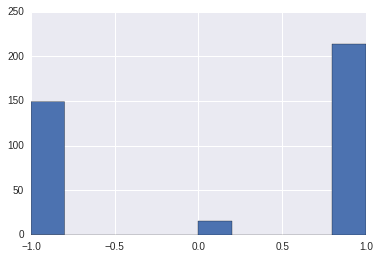

In [226]:
# performance on test data
plt.hist( y_test * pred);

In [227]:
sr=pd.Series(y_test * pred).value_counts()
sr

 1    214
-1    149
 0     15
Name: Open Change, dtype: int64

In [228]:
sr.apply(lambda x: float(x) / np.sum(sr))

 1    0.566138
-1    0.394180
 0    0.039683
Name: Open Change, dtype: float64

In [229]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
lm_model_2 = lm.fit(Xs_train, y_train)
print('Logistic score for test set: %f' % lm_model_2.score(Xs_test, y_test))
print('Logistic score for training set: %f' % lm_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, lm_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

Logistic score for test set: 0.619048
Logistic score for training set: 0.626243
             precision    recall  f1-score   support

       -1.0       0.55      0.56      0.55       149
        0.0       0.00      0.00      0.00        15
        1.0       0.67      0.71      0.69       214

avg / total       0.59      0.62      0.61       378



Ridge Regression

In [238]:
from sklearn import linear_model
lm = linear_model.Ridge(alpha=0.5)
lm_model_1 = lm.fit(X_train, y_train)
print('RIDGE Regression accuracy for test set: %f' % lm_model_1.score(X_test, y_test))

Logistic Regression accuracy for test set: 0.250674


Bayesian Ridge Regression

In [240]:
from sklearn import linear_model
lm = linear_model.BayesianRidge()
lm_model_1 = lm.fit(X_train, y_train)
print('Bayesian Ridge Regression accuracy for test set: %f' % lm_model_1.score(X_test, y_test))

Bayesian Ridge Regression accuracy for test set: 0.250744


Support Vector Machines

In [231]:
from sklearn.svm import SVC
svm = SVC(kernel='linear')
svm_model_1 = svm.fit(X_train, y_train)
print('SVC accuracy for test set: %f' % svm_model_1.score(X_test, y_test))

SVC accuracy for test set: 0.626984


In [232]:
from sklearn.metrics import classification_report
y_true, y_pred = y_test,svm_model_1.predict(X_test)
print(classification_report(y_true, y_pred))

             precision    recall  f1-score   support

       -1.0       0.55      0.63      0.59       149
        0.0       0.00      0.00      0.00        15
        1.0       0.69      0.67      0.68       214

avg / total       0.61      0.63      0.62       378



In [233]:
from sklearn.preprocessing import scale
Xs = scale(X)
from sklearn.cross_validation import train_test_split
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.2, random_state=42)
svm_model_2 = svm.fit(Xs_train, y_train)
print('SVC for test set: %f' % svm_model_2.score(Xs_test, y_test))
print('SVC for training set: %f' % svm_model_2.score(Xs_train, y_train))
y_true, y_pred = y_test, svm_model_2.predict(Xs_test)
print(classification_report(y_true, y_pred))

SVC for test set: 0.626984
SVC for training set: 0.626905
             precision    recall  f1-score   support

       -1.0       0.55      0.63      0.59       149
        0.0       0.00      0.00      0.00        15
        1.0       0.69      0.67      0.68       214

avg / total       0.61      0.63      0.62       378



 1    0.566138
-1    0.394180
 0    0.039683
Name: Open Change, dtype: float64

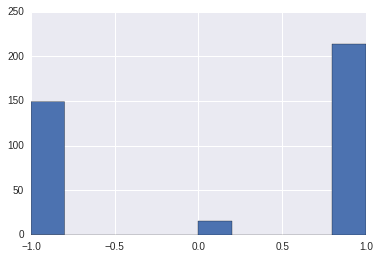

In [235]:
pred = np.where(svm_model_1.predict( X_test) == 0, -1, 1)
# performance on test data
plt.hist( y_test * pred);
sr=pd.Series(y_test * pred).value_counts()
sr.apply(lambda x: float(x) / np.sum(sr))

In [236]:
def plot_svc_decision_function(svm, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = svm.decision_function(np.array([xi, yj]).reshape(1, -1))
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [260]:
#plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='spring')
#plot_svc_decision_function(svm);

PREDICTION USING SVC

In [300]:
#print(svm.predict([1,-1]))
print(svm_model_2.predict([1,1,1,1,1,1]))

[ 1.]


/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


In [284]:
#svm_model_2.decision_function(X)
svm_model_2.predict(y)

/home/octo/anaconda2/envs/PyAlgo/lib/python2.7/site-packages/sklearn/utils/validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


ValueError: X.shape[1] = 1887 should be equal to 6, the number of features at training time

[  2.54686688e-05   0.00000000e+00   7.47106344e-05  -8.10990125e-05
  -2.41583829e-04  -1.61672435e-04]


TypeError: unhashable type

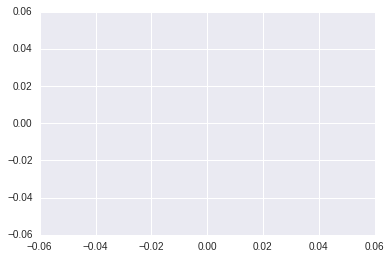

In [267]:
w = svm_model_2.coef_[0]
print(w)

a = -w[0] / w[1]

xx = np.linspace(0,12)
yy = a * xx - svm_model_2.intercept_[0] / w[1]

h0 = plt.plot(xx, yy, 'k-', label="non weighted div")

plt.scatter(X[:, 0], X[:, 1], c = y)
plt.legend()
plt.show()